### Task 5 - Sales Predictions

Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.

Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let’s start the task of sales prediction with machine learning using Python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [3]:
# read the data
data = pd.read_csv('Advertising.csv')

In [4]:
# Disply the first few rows of the dataset
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
# Droping the unnecessary columns
data = data.drop(['Unnamed: 0'], axis=1)

# Reset the index of the DataFrame
data.reset_index()

# Display the first few rows of the modified DataFrame
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
# Check for duplicate
data.duplicated().sum() 

0

In [7]:
# check on null values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [21]:
# Get statistical summary of the numerical columns

data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


* The dataset comprises a total of 200 recods
* There are no missing values present in the dataset

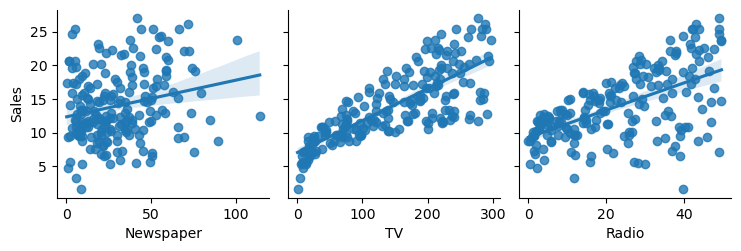

In [8]:
# Scatter plots to check the linearity assumption between each independent variable and the dependent variable

sns.pairplot(data, x_vars=["Newspaper", "TV", "Radio"], y_vars="Sales",kind='reg')

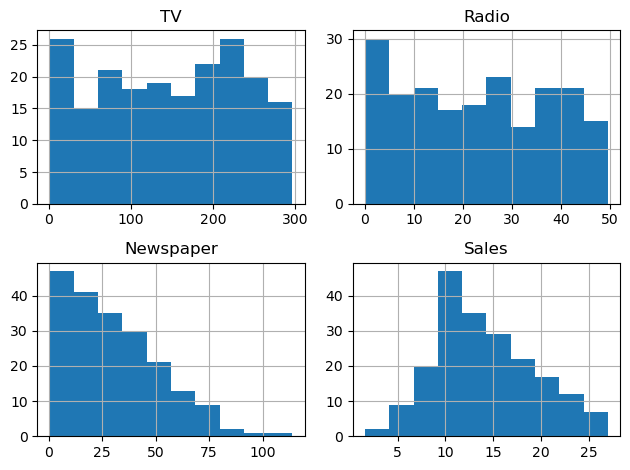

In [15]:
# Histogram to check the normality
data.hist(bins=10)
plt.tight_layout()
plt.show()

* Sales data appears to follow a roughly normal distribution. If it does, it suggests that the normality assumption is met.

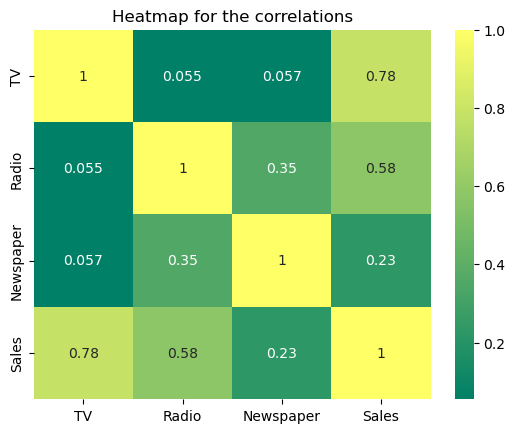

In [17]:
#Heatmap

sns.heatmap(data.corr(),annot=True,cmap="summer")
plt.title("Heatmap for the correlations")
plt.show()

There is a moderate positive correlation of around 0.58 between the radio advertising budget and sales;

There is a weak positive correlation of approximately 0.23 between the newspaper advertising budget and sales.

<Figure size 1200x800 with 0 Axes>

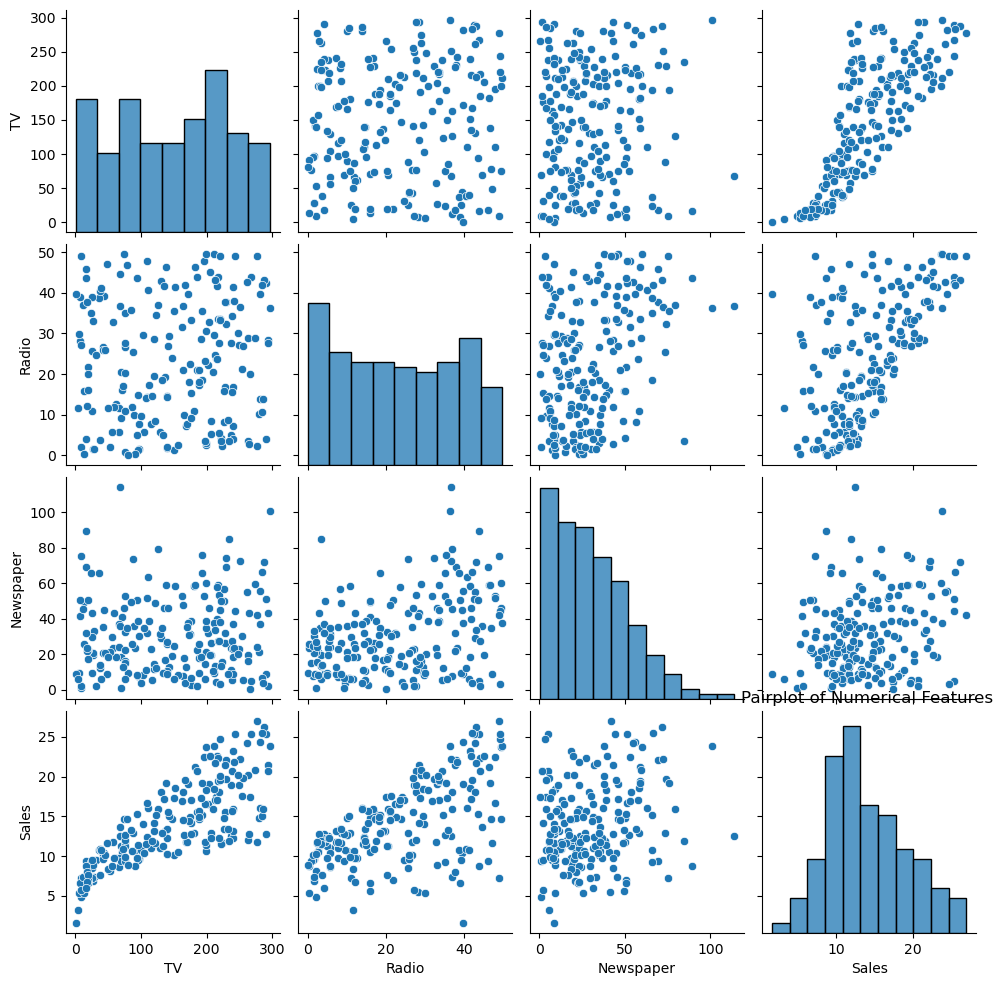

In [22]:
# Pairplot to visualize relationships between numerical features

sns.pairplot(data, vars=['TV', 'Radio', 'Newspaper', 'Sales'])
plt.title('Pairplot of Numerical Features ')
plt.show()

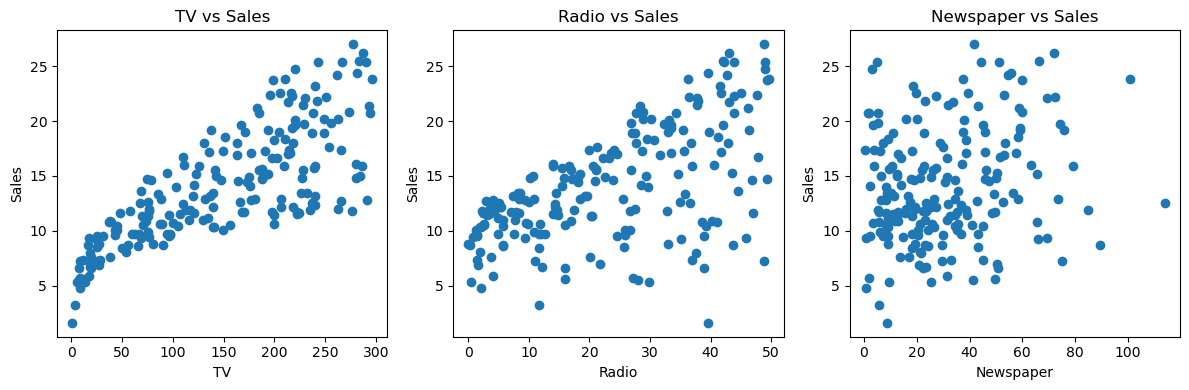

In [26]:
# Scatter plot for TV vs Sales
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(data['TV'], data['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales')

# Scatter plot for Radio vs Sales
plt.subplot(1, 3, 2)
plt.scatter(data['Radio'], data['Sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Radio vs Sales')

# Scatter plot for Newspaper vs Sales
plt.subplot(1, 3, 3)
plt.scatter(data['Newspaper'], data['Sales'])
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Newspaper vs Sales')

plt.tight_layout()
plt.show()


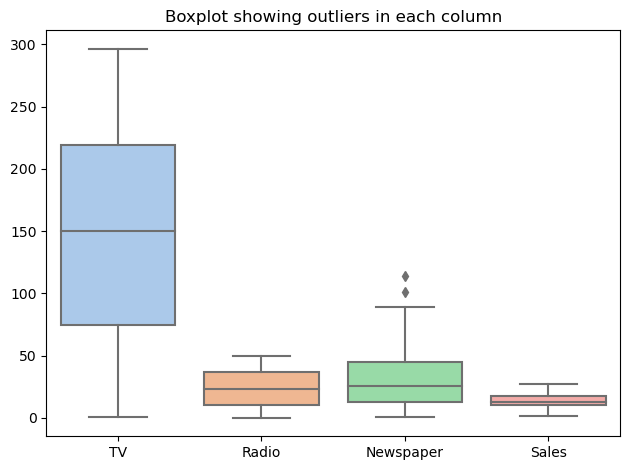

In [28]:
# Outliers
# Create boxplots for each column to identify outliers
sns.boxplot(data=data, palette="pastel")
plt.title('Boxplot showing outliers in each column')

plt.tight_layout()
plt.show()

* We can see that the TV, Radio, and Sales columns do not contain any outliers. However, the Newspaper column has two outliers, indicating the presence of unusual or extreme values in that specific variable.

### Model Training

In [8]:
x = data.drop(columns='Sales')
y = data['Sales']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 25)

LinearRegression

In [9]:
logr = LinearRegression()
logr.fit(x_train, y_train)

print('''Model's accuracy: ''',(logr.score(x_test, y_test)) * 100)

Model's accuracy:  89.26677775783507


In [11]:
y_pred = logr.predict(x_test)

In [12]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R-squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1.277513690912234
Mean Squared Error: 2.7517987238444217
R-squared: 0.8926677775783507


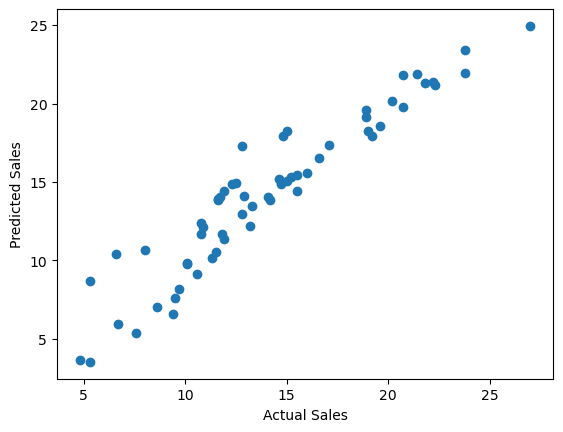

In [13]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

In [14]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R-squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.6048999999999981
Mean Squared Error: 0.6085375666666618
R-squared: 0.9762643652344799


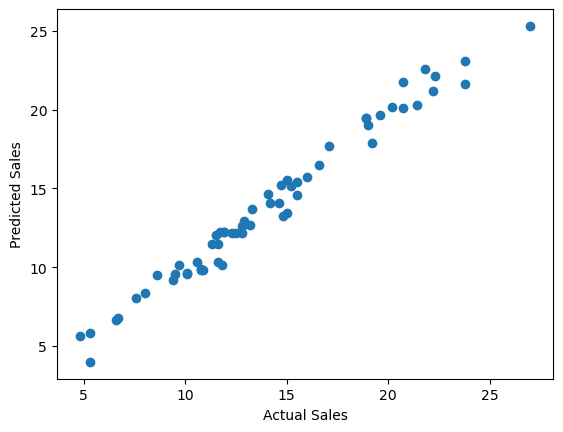

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()